<center><h2> Quantum Scattering by Square Well</h2></center>
<p>
    A particle scatters from the potential 
    $$
V(r)  =  \begin{cases}
-|V_0|, & \hbox{if }  0 \leq r \leq a ,\\[4pt]
0, & \hbox{otherwise}.\end{cases} $$

Its wave function is:
     $$R_\ell(\rho) =  j_\ell (\rho) \quad (r<a)$$
     
 $$ R_\ell (r) =  e^{i\delta_\ell}[\cos\delta_\ell \, j_\ell(kr)-\sin \delta_\ell\, n_\ell(kr)] \quad (r>a)$$
 
 Matching the log derivative of the two parts of the wavefunction yields the phase shift 
  $$  
 \tan \delta_\ell  = \frac{k j'_\ell(ka) -\gamma_\ell j_\ell(ka)}{kn'_\ell(ka)-\gamma_\ell n_\ell(ka)}.
 $$
 The cross sections are then:
  $$
  \frac{d\sigma}{d\Omega} = \frac{1}{k^2}\Bigl | \sum_{\ell = 0}^\infty (2\ell +1) e^{i\delta_\ell} \,\sin \delta_\ell \, P_\ell (\cos \theta) \Bigr |^2, \quad 
 $$
  and the total  cross section is:
  $$
  \sigma_{tot}   =  \frac{4\pi}{k^2} \sum_{\ell = 0}^\infty (2\ell +1) \sin \delta_\ell^2. 
  $$
  The cross sections are calculated. 

In [1]:
# SquareWellScattMod.ipynb: quantum scattering from a square well

""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased)
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2020. 
    Please respect copyright & acknowledge our work."""

% matplotlib notebook

import scipy.special
import matplotlib.pyplot as plt
import numpy as np
from math import * 

a  =  1;  V  =  15   # well width and depth
E  =  10         
nLs  =  10;  Nin  =  100;  Nout  =  100
nexpts = 100      # number points to plot external wf
ninpts = 100      # number points to plot internal wf
n = 10            # number of partial waves
alpha  =  np.sqrt(V+E);
beta  =  np.sqrt(E) 
delta   =  np.zeros((n),float) # will contain phaseshifts
SigL  =  np.zeros((nLs,200),float) 
jnb = np.zeros((n))
jnpr = np.zeros((n))
jprb = np.zeros((n))
gamm = np.zeros((n),float)  
ynb = np.zeros((n))
yprb = np.zeros((n))
jnf = np.zeros((n))
jnfr = np.zeros((n))
jnint = np.zeros((n))
jnintpr = np.zeros((n))
jnxt = np.zeros((n))
nxt = np.zeros((n))
jnintpr = np.zeros((n),float)
partot = np.zeros((n,200),float)
 
def Gam(n,xx): # Spherical Bessel ratio
    gamma  =  np.zeros((n),float)
    for nn in range(0,n): 
        jn = scipy.special.spherical_jn(nn,xx,False) # function
        jpr = scipy.special.spherical_jn(nn,xx,True) # derivative
        gamma[nn]  =  alpha*jpr/jn   # match outside-inside
    return gamma 
    
def phaseshifts(n,alpha,beta):
    gamm  =  Gam(n,alpha)
    for i in range(0,n):
       jnb[i]  =  scipy.special.spherical_jn(i,beta,False)#funct
       jnpr[i]  =  scipy.special.spherical_jn(i,beta,True)#deriv
       ynb[i]  =  scipy.special.spherical_yn(i,beta,False) #func
       yprb[i]  =  scipy.special.spherical_yn(i,beta,True)
    for i in range(0,n):
        num1  =  gamm[i]*jnb[i]
        den1  =  gamm[i]*ynb[i]
        num  =  beta*jnpr[i]-num1
        den  =  beta*yprb[i]-den1 
        td  =  atan2(num,den)      
        delta[i]  =  td
   
def totalcrossect(n,alpha,beta): # cross sections
    delta  =  phaseshifts(n,alpha,beta)  
    suma   =   0
    for i in range (0,n):  suma  =  suma+(2*i+1)*(sin(delta[i]))**2
    return 4*np.pi*suma/beta**2
    
def plotcross(alpha,beta):  
    e  =  0. 
    cross  =  np.zeros((200),float)         # total crossection
    delta  =  phaseshifts(n,alpha,beta)
    en  =  np.zeros((200),float)                # energies
    for i in range (1,200):
       e  =  e + 100/300.
       en[i]  =  e
       alpha  =  np.sqrt(V+e)
       beta  =  np.sqrt(e)   
       cross[i]  =  totalcrossect(n,alpha,beta)
       for m in range(0,n): 
            partot[m,i] = 4*pi*(2*m+1)*(sin(delta[m]))**2/beta**2
    f2  =  plt.figure()
    ax2  =  f2.add_subplot(111)       
    plt.plot(en,cross,label  =  "Total")
    plt.plot(en,partot[0,:],label  =  "S ")
    plt.plot(en,partot[1,:], label  = "P ")
    plt.plot(en,partot[2,:],label  =  "D")
    plt.plot(en,partot[3,:],label  =  "E")
    plt.title("Total & Partial Cross Sections")
    plt.legend()
    plt.xlabel("Energy")

def diffcrossection():       # differentialcross section
        zz2  =  np.zeros((n),complex)
        dcr  =  np.zeros((180),float)
        delta  =  phaseshifts(n,alpha,beta)     # phaseshifts
        for i in range(0,n):               # n partial waves
            cosd  =  cos(delta[i])
            sind  =  sin(delta[i])
            zz  =  complex(cosd,sind)
            zz2[i]  =  zz*sind
        for ang in range(0,180):
            summ  =  0.
            radi  =  cos(ang*pi/180.)   
            for i in range(0,n):       #  partial wave loop
                poL  =  scipy.special.eval_legendre(i,radi) 
                summ +=  (2*i+1)*zz2[i]*poL
            dcr[ang]  =  (summ.real**2 +summ.imag**2)/beta**2
        angu  =  np.arange(0,180)    
        f1  =  plt.figure()          # plot separate figure
        ax1  =  f1.add_subplot(111)
        plt.semilogy(angu,dcr)       # Semilog dsig/dw plot
        plt.xlabel("Scattering Angle")
        plt.title ("Differential Cross Section")
        plt.grid()    

<IPython.core.display.Javascript object>


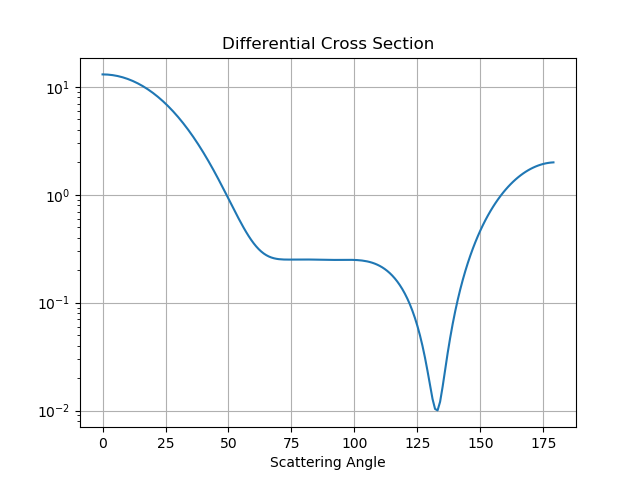

<IPython.core.display.Javascript object>


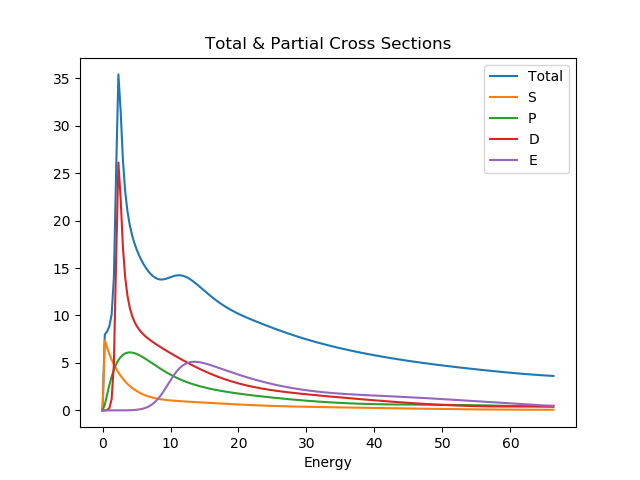

<IPython.core.display.Javascript object>


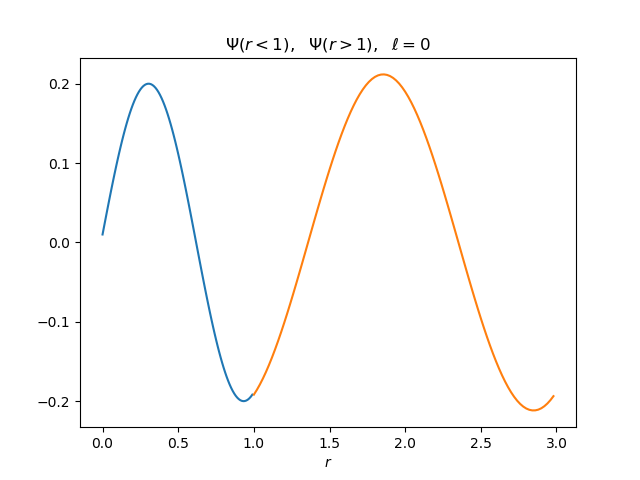

In [2]:
def wavefunction():             # Compute Psi(<1) & Psi(>1)
     delta  =  phaseshifts(n,alpha,beta)
     BL  =  np.zeros((n),complex)
     Rin  =  np.zeros((n,Nin),float)       # Psi(r<1), nLs
     Rex  =  np.zeros((n,nexpts),float)
     for i in range (0,10):            # BL for matching
          jnb[i] =  scipy.special.spherical_jn(i,alpha,False) # SphBes
          jnpr[i]  =  scipy.special.spherical_jn(i,alpha,True) #Derv SphBes
          jnf[i] =  scipy.special.spherical_jn(i,beta,False)
          jnfr[i]  =  scipy.special.spherical_jn(i,beta,True)
          ynb[i] =  scipy.special.spherical_yn(i,beta,False)
          yprb[i]  =  scipy.special.spherical_yn(i,beta,True)
          cosd  =  cos(delta[i])
          sind  =  sin(delta[i])
          zz  =  complex(cosd,-sind)
          num  =  jnb[i]*zz
          den  =  cosd*jnf[i]-sind*ynb[i]
          BL[i]  =  num/den      # For wavefunction match
     intr  =  1.0/Nin                  # Points increment          
     for i in range(0,n):                # Internal Psi 
          rin  =  intr
          for ri in range(0,Nin):          # PsiIn plot
              alpr  =  alpha*rin
              jnint[i]  =  scipy.special.spherical_jn(i,alpr,False)
              jnintpr[i]  =  scipy.special.spherical_jn(i,alpr,True)
              Rin[i,ri]  =  rin*jnint[i]
              rin  =  rin+intr
     extr  =  2./nexpts             
     for i in range(0,n):   
          rex  =  1.0
          for rx in range(0,nexpts):     # PsiIn plot
              argu  =  beta*rex
              jnxt[i] =  scipy.special.spherical_jn(i,argu,False)
              nxt[i]  =  scipy.special.spherical_yn(i,argu,False)
              factr  =  jnxt[i]*cos(delta[i])-nxt[i]*sin(delta[i])
              fsin  =  sin(delta[i])*factr
              fcos  =  cos(delta[i])*factr
              Rex[i,rx]  =  rex*(fcos*BL.real[i]-fsin*BL.imag[i] )
              rex  =  rex+extr       
     ai  =  np.arange(0,1,intr)       
     nwaf  =  0     # PsiL to plot, CHANGE FOR OTHER WAVES
     f3  =  plt.figure()
     ax3  =  f3.add_subplot(111)
     plt.plot(ai,Rin[nwaf, :])   
     ae  =  np.arange(1,3,extr)   
     plt.title("$\Psi(r<1), \ \ \Psi(r>1), \ \ \ell  =  0$")
     plt.xlabel ("$r$")
     plt.plot(ae,Rex[nwaf, :])  

diffcrossection()               # Diff crossection 
plotcross(alpha,beta)          # Total crossections    
wavefunction()                 # Psi